### In Final Semester, I'll perform on the student performance factors during education ###

## 1. Library imports and setup ##

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print('Student Performance Data Science Analysis')
print('='*50)

Student Performance Data Science Analysis


## 2. Initial Data Loading ##
In this section, we load the dataset and perform initial exploration to understand the data structure, quality, and basic statistics.

In [9]:
# Data Loading and Initial Exploration
print('Loading and exploring the dataset...')
df = pd.read_csv("C:/Users/Mian Faheem/Desktop/StudentPerformanceFactors.csv")

Loading and exploring the dataset...


In [10]:
print(f'Dataset shape: {df.shape}')
print(f'Dataset info:')
print(df.info())

Dataset shape: (6607, 20)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Inf

In [11]:
print(f'First 5 rows:')
print(df.head())

First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0 

In [12]:
print(f'end= 5 rows:')
print(df.head())

end= 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0  

In [13]:
print(f'Statistical summary:')
print(df.describe())

Statistical summary:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000

### Data Quality Assessment

We check for missing values, duplicates, and examine the unique values in each column to ensure data quality.

In [14]:
# Check for missing values
print(f'Missing values:')
print(df.isnull().sum())

Missing values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [15]:
# Data Quality Assessment
print(f'Duplicate rows: {df.duplicated().sum()}')
print(f'Unique values per column:')
unique_counts = {col: df[col].nunique() for col in df.columns}
unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique Count'])
unique_counts_df.index.name = 'Column'
display(unique_counts_df)

Duplicate rows: 0
Unique values per column:


,Unique Count
Column,
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2


## **3. Exploratory Data Analysis (EDA)**
### 3.1 Distribution of Numerical Variables

We examine the distribution of all numerical variables to understand their characteristics and identify any patterns or outliers.

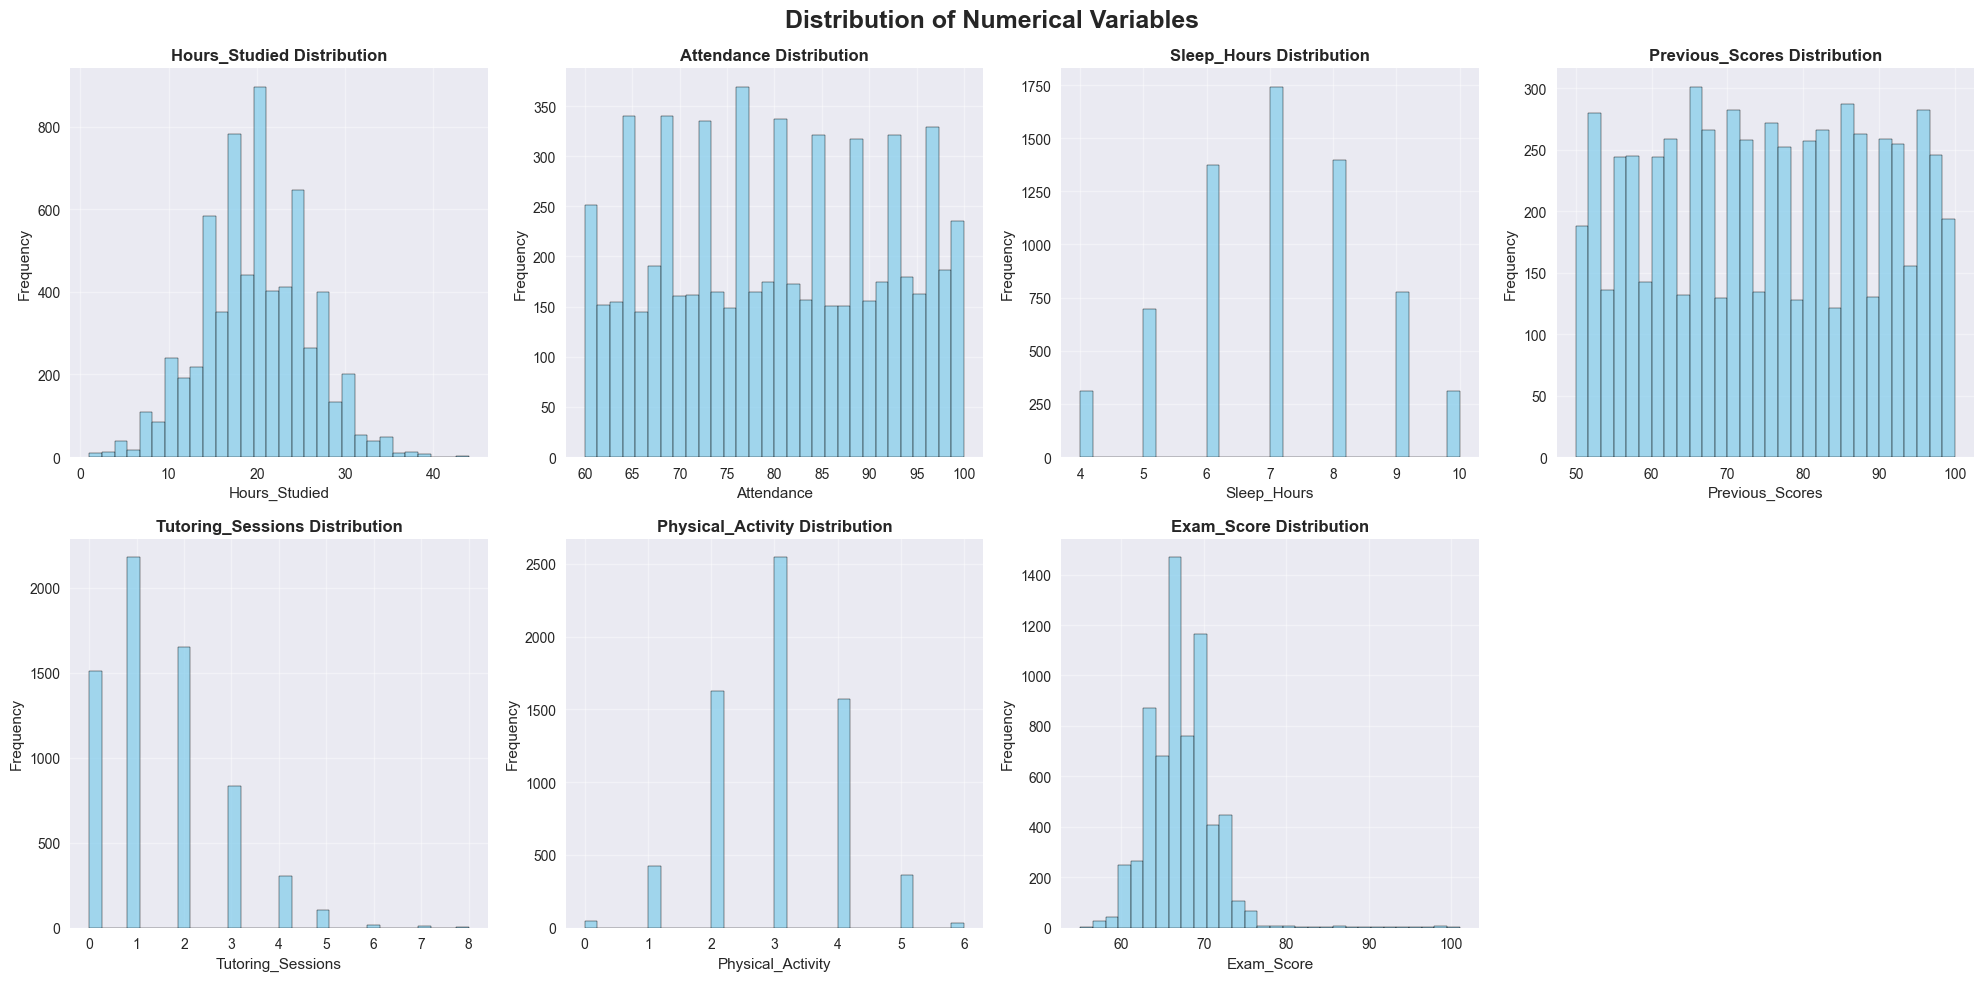

In [25]:
# Distribution of numerical variables
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=18, fontweight='bold')

numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
                  'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

for i, col in enumerate(numerical_cols):
    row = i // 4
    col_idx = i % 4
    sns.histplot(data=df, x=col, bins=30, ax=axes[row, col_idx], color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.4)

# Remove empty subplot
fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

### 3.2 Professional Pie Charts for Categorical Variables 

Categorical Variables Distribution:


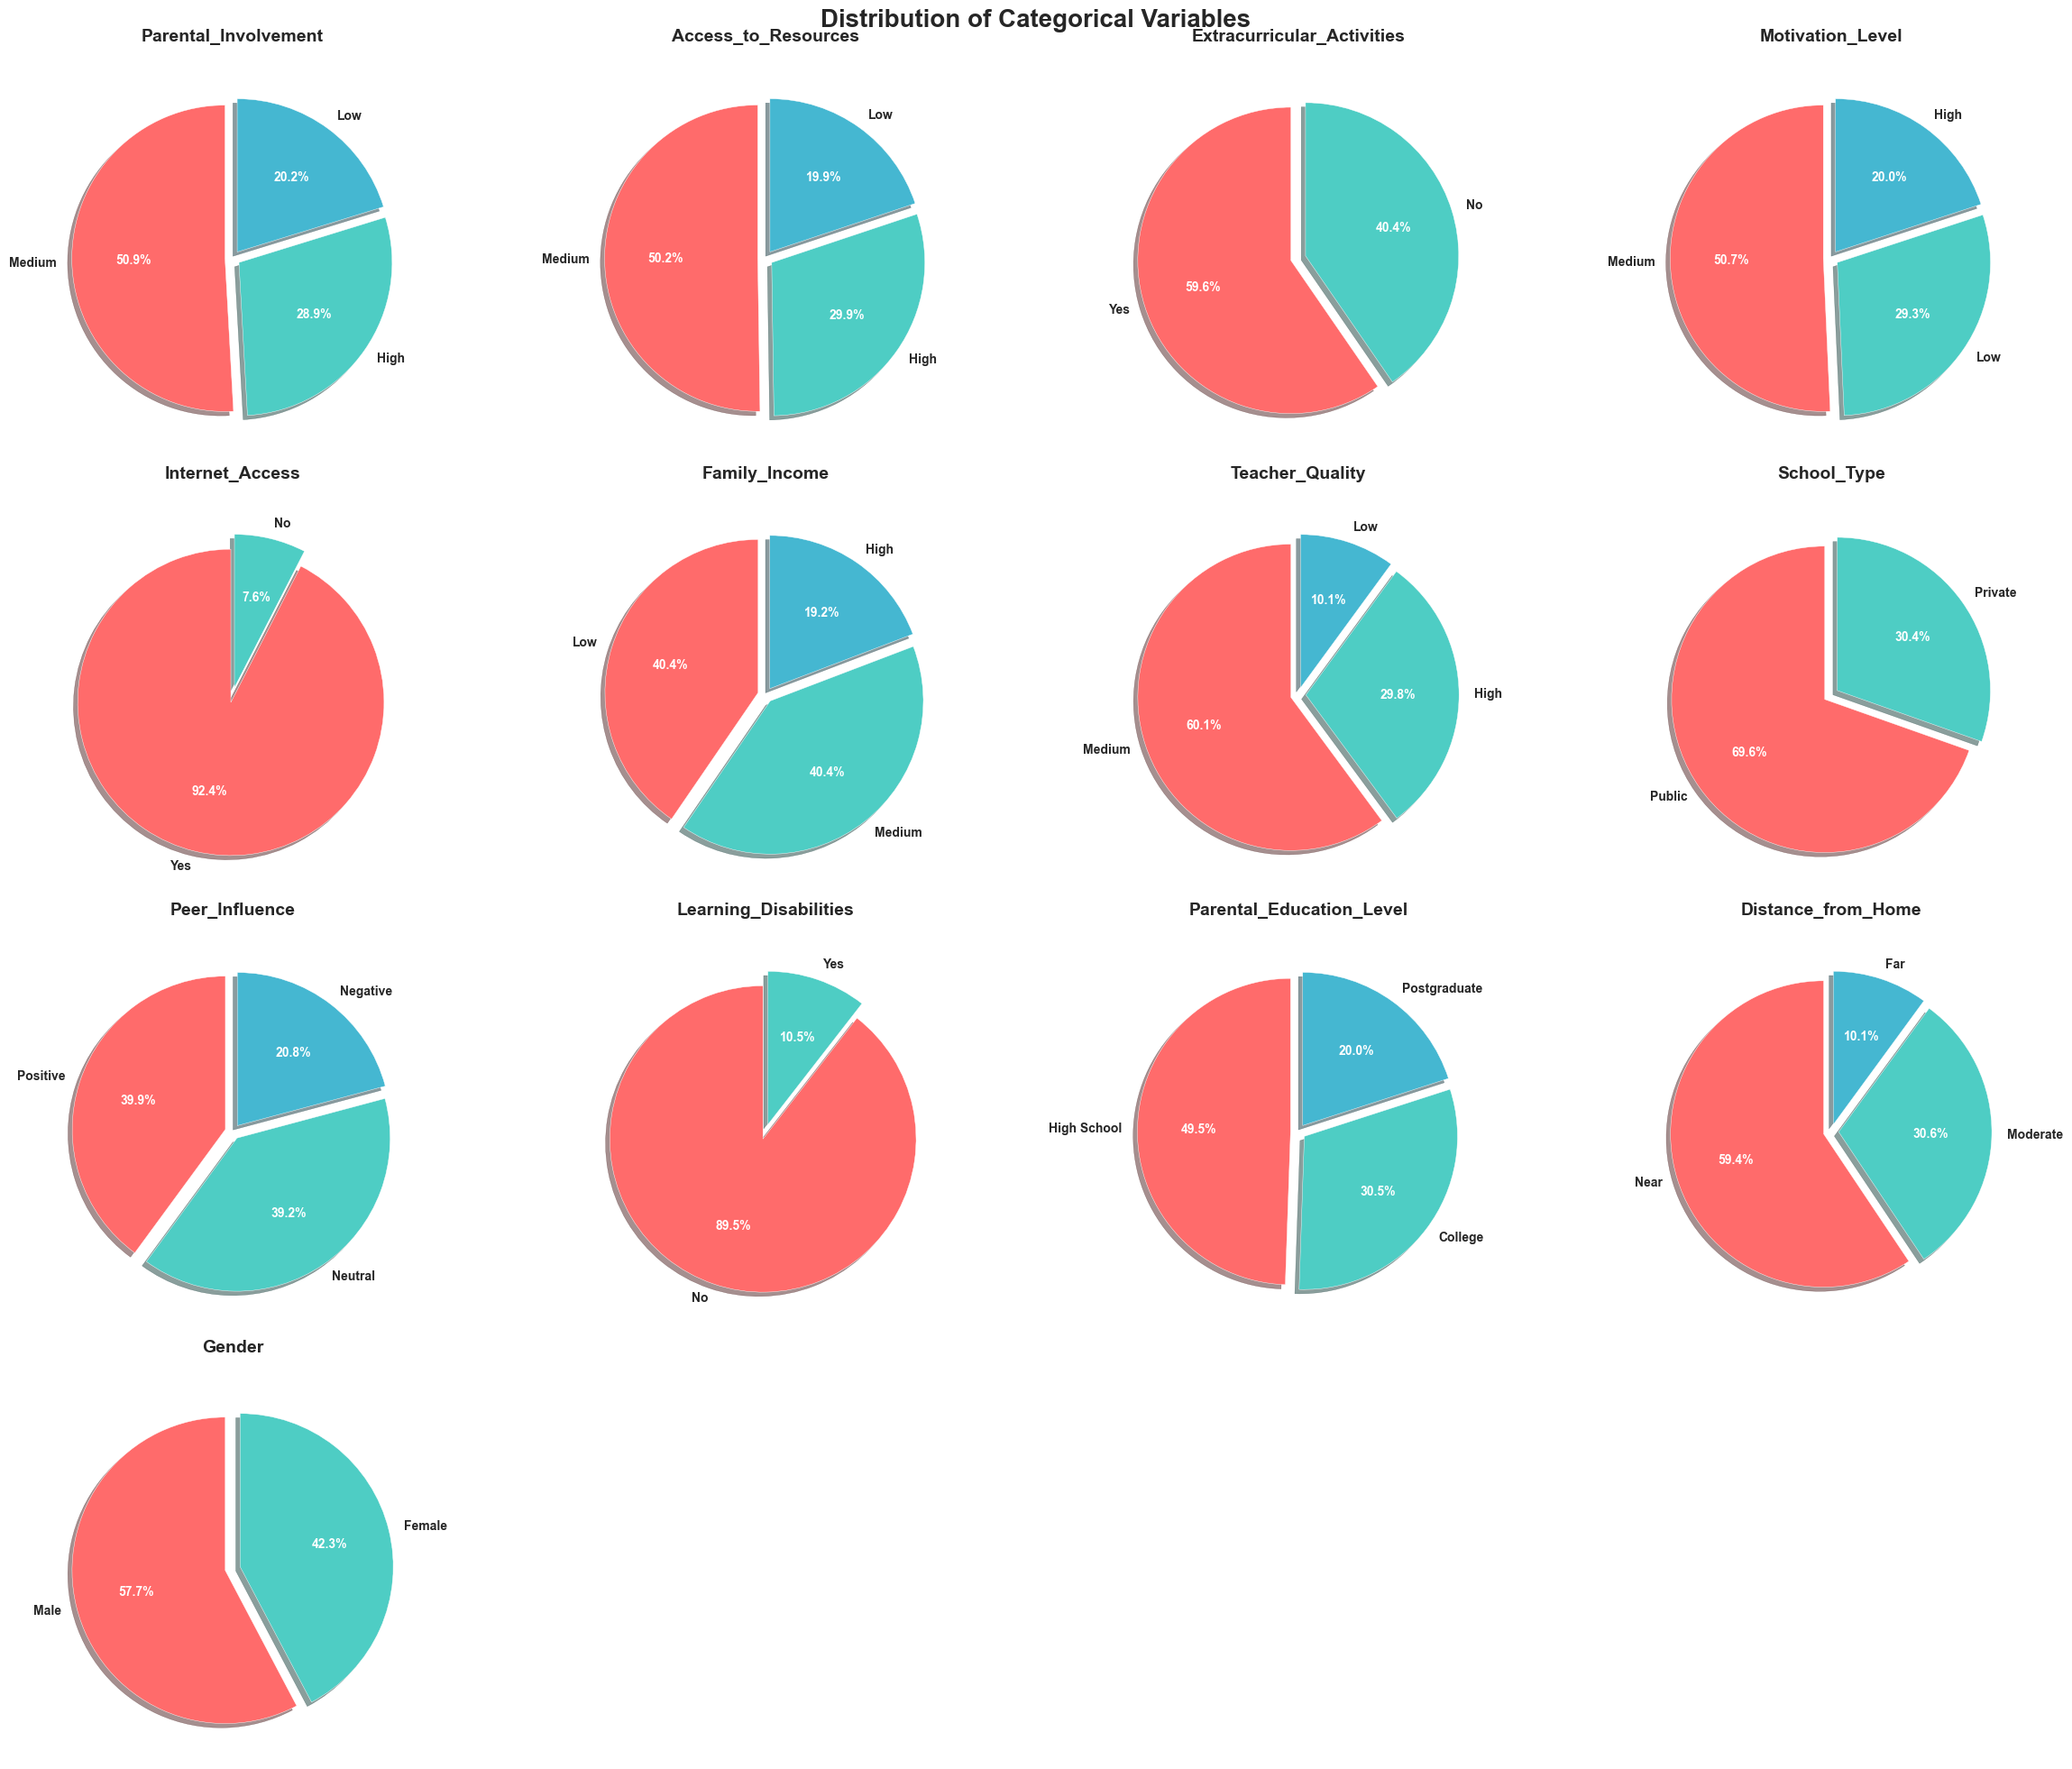

In [26]:
# Pie Charts for Categorical Variables
print('Categorical Variables Distribution:')

categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                   'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                   'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
                   'Distance_from_Home', 'Gender']

# Create professional pie charts
fig, axes = plt.subplots(4, 4, figsize=(24, 20))
fig.suptitle('Distribution of Categorical Variables', fontsize=20, fontweight='bold')

# Define professional color palettes
colors_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']

for i, col in enumerate(categorical_cols):
    row = i // 4
    col_idx = i % 4

    # Calculate value counts and percentages
    value_counts = df[col].value_counts()
    percentages = (value_counts / len(df)) * 100

    # Create pie chart with professional styling
    wedges, texts, autotexts = axes[row, col_idx].pie(
        value_counts.values,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors_palette[:len(value_counts)],
        explode=[0.05] * len(value_counts),  # Slight separation for better visibility
        shadow=True,
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )

    # Enhance text appearance
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    axes[row, col_idx].set_title(f'{col}', fontsize=14, fontweight='bold', pad=20)

# Remove empty subplots
for i in range(len(categorical_cols), 16):
    row = i // 4
    col_idx = i % 4
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

### 3.3 Correlation Analysis

The correlation heatmap reveals relationships between numerical variables, helping identify potential multicollinearity and important predictors.

Correlation Analysis:


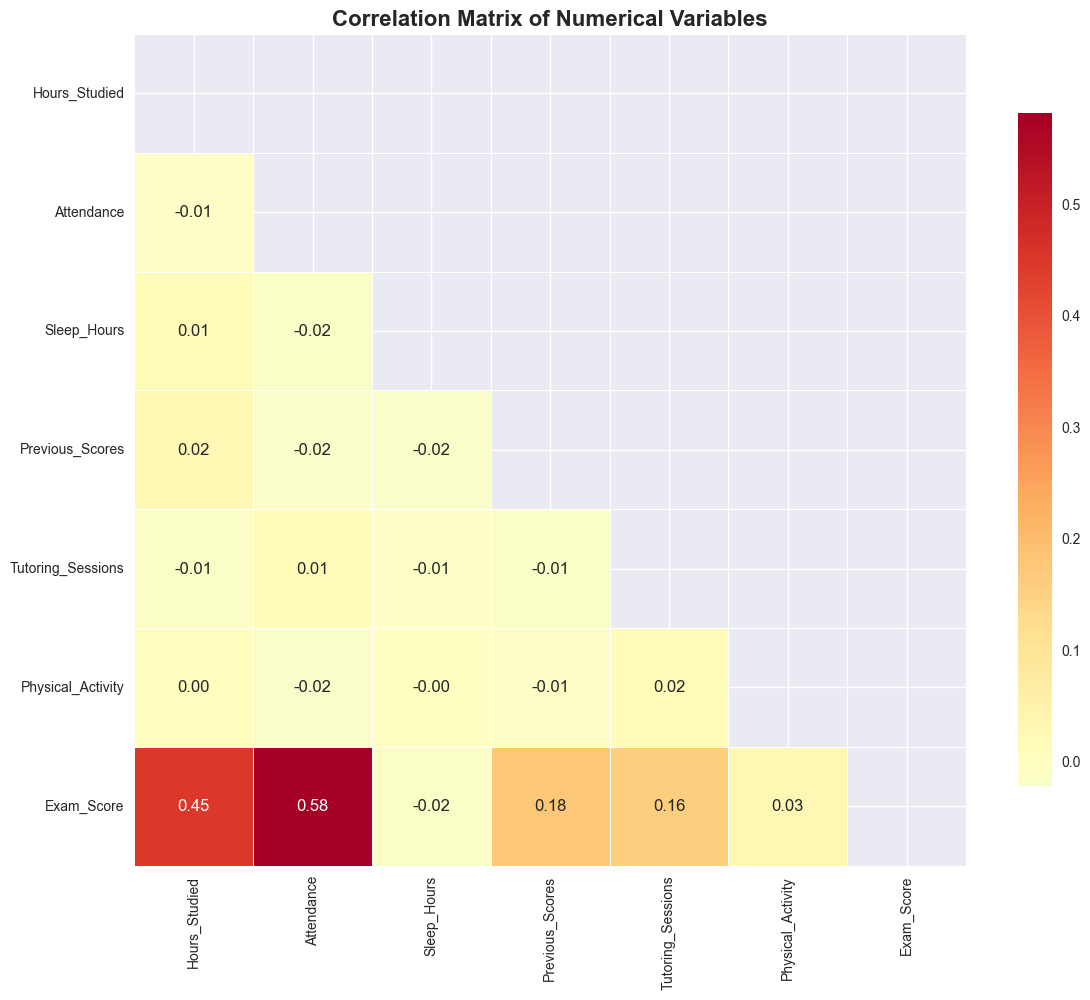

In [27]:
# Correlation Analysis
print('Correlation Analysis:')

# Select numerical columns for correlation
numerical_df = df[numerical_cols]
correlation_matrix = numerical_df.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': .8}, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

This correlation matrix displays the connections between the variables:

Hours_Studied (0.45) and Attendance (0.58) are positively correlated with Exam_Score, indicating that more attendance and more study time will probably result in better test marks.


The link between exam performance and previous scores (0.18) and tutoring sessions (0.16) is weakly favorable.

Physical activity and sleep hours exhibit very minimal association, indicating that they have little to no direct effect on exam score in this sample.

### 3.4 Categorical vs Numerical Relationships

Box plots show how exam scores vary across different categorical variables, revealing important patterns in student performance.

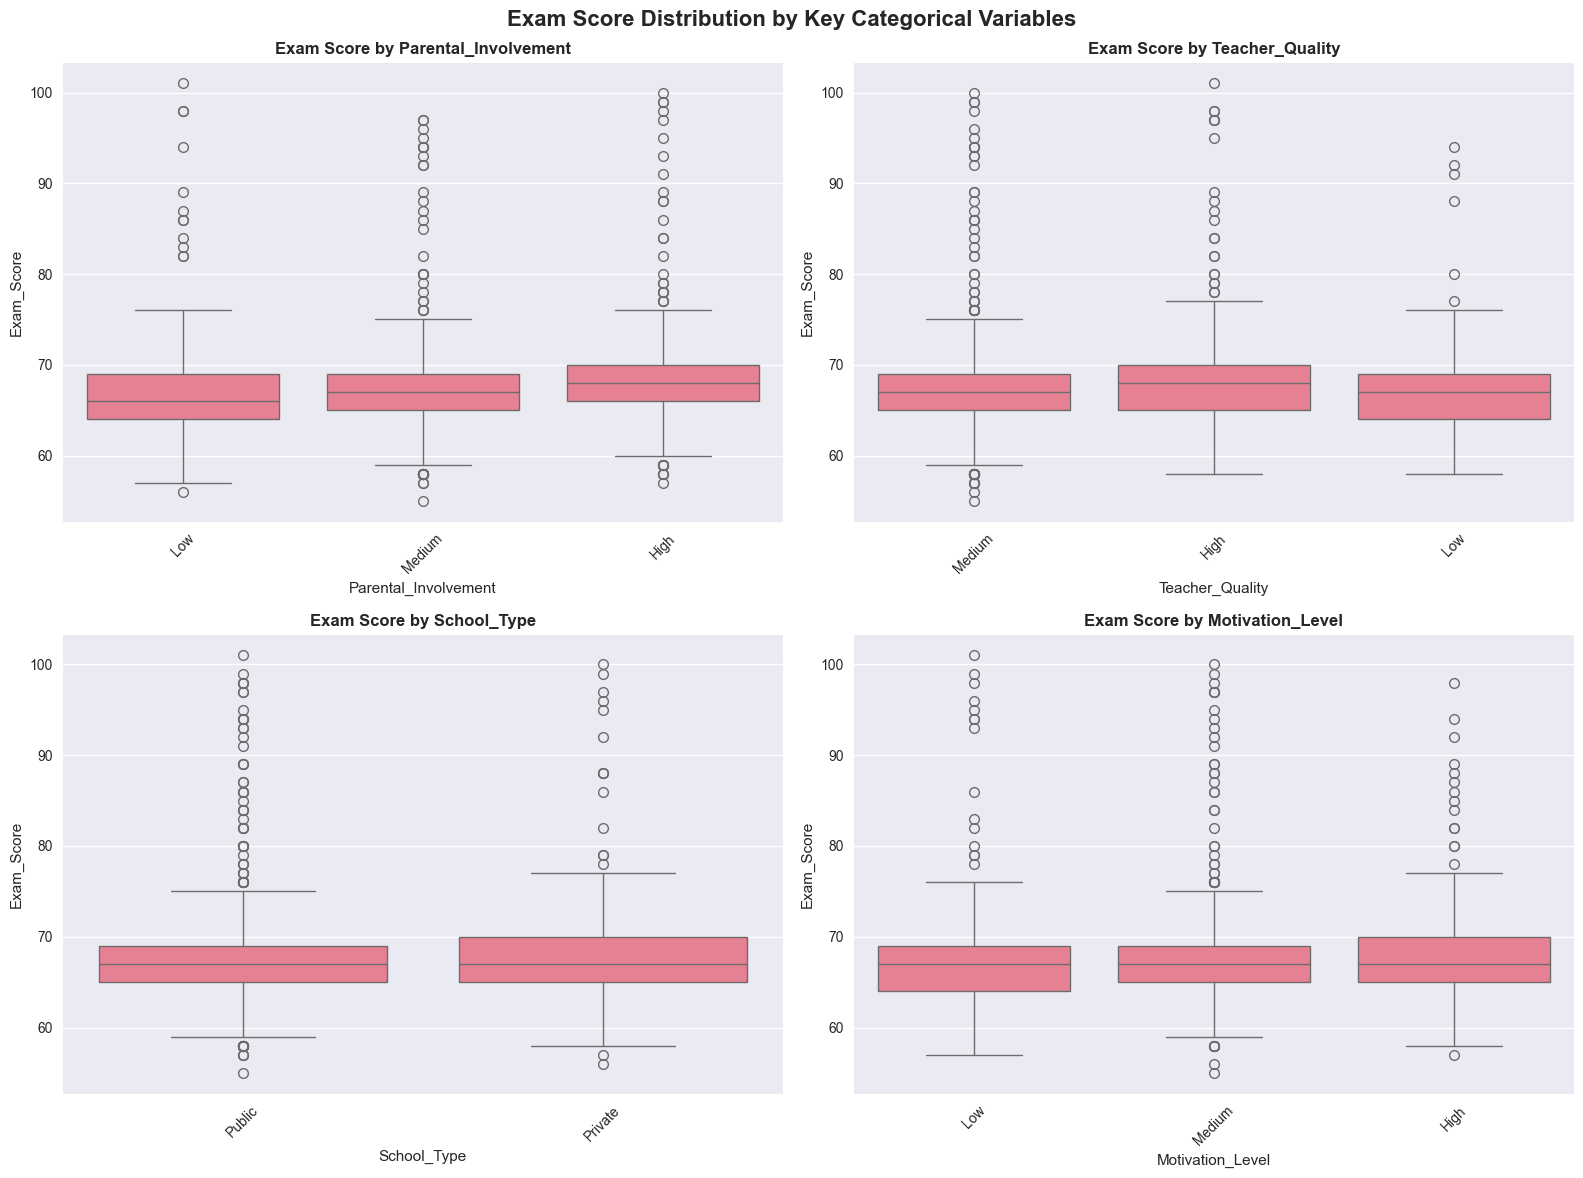

In [28]:
# Box plots for categorical vs numerical relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Exam Score Distribution by Key Categorical Variables', fontsize=16, fontweight='bold')

key_categorical = ['Parental_Involvement', 'Teacher_Quality', 'School_Type', 'Motivation_Level']

for i, cat_col in enumerate(key_categorical):
    row = i // 2
    col_idx = i % 2
    sns.boxplot(data=df, x=cat_col, y='Exam_Score', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Exam Score by {cat_col}', fontweight='bold')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Parental Involvement ####
Students with High parental involvement tend to have slightly higher median exam scores.
Overall, the difference across Low, Medium, High is small.

#### Teacher Quality ####
Median exam scores are similar across Low, Medium, and High teacher quality groups.
No strong visible difference, suggesting teacher quality has minimal direct visible impact in this dataset.

#### School Type ####
Private school students show a slightly higher median exam score than Public school students.
But both have wide distributions with many outliers.

#### Motivation Level ####
Students with High motivation have a slightly higher median score than Low and Medium motivated students.
However, the differences aren't large, distributions overlap significantly.

#### Overall Conclusion ####
Parental Involvement, School Type, and Motivation Level show a slight positive influence on exam scores.

Teacher Quality doesn't show a strong visible impact here.

The effects are mild; other factors (like Attendance from your earlier correlation) might be stronger predictors.

## **4. Feature Engineering**

Feature engineering involves creating new meaningful variables from existing data to improve model performance and interpretability.

In [31]:
# Create new features
df['Study_Efficiency'] = df['Exam_Score'] / (df['Hours_Studied'] + 1)  # +1 to avoid division by zero
df['Academic_Support'] = (df['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3}) +
                         df['Teacher_Quality'].map({'Low': 1, 'Medium': 2, 'High': 3})) / 2
df['Resource_Access_Score'] = (df['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3}) +
                              df['Internet_Access'].map({'No': 0, 'Yes': 1})) / 2
df['Wellness_Score'] = (df['Sleep_Hours'] / 12 + df['Physical_Activity'] / 7) / 2

print('New features created:')
print('- Study_Efficiency: Measures exam score per hour studied (efficiency metric)')
print('- Academic_Support: Combined parental involvement and teacher quality score')
print('- Resource_Access_Score: Combined access to resources and internet availability')
print('- Wellness_Score: Combined sleep and physical activity wellness indicator')

New features created:
- Study_Efficiency: Measures exam score per hour studied (efficiency metric)
- Academic_Support: Combined parental involvement and teacher quality score
- Resource_Access_Score: Combined access to resources and internet availability
- Wellness_Score: Combined sleep and physical activity wellness indicator


## **5. Data Preprocessing**

Data preprocessing prepares the dataset for machine learning by encoding categorical variables and preparing feature matrices.

### 5.1 Categorical Variable Encoding

We use Label Encoding to convert categorical variables into numerical format suitable for machine learning algorithms.

In [32]:
# Encode categorical variables
le_dict = {}
categorical_columns = df.select_dtypes(include=['object']).columns

print('Categorical Variable Encoding:')
print('='*30)
for col in categorical_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    le_dict[col] = le
    print(f'\n--- {col} ---')
    encoding_map = dict(zip(le.classes_, le.transform(le.classes_)))
    for key, value in encoding_map.items():
        print(f'  {key}: {value}')

# Prepare features for modeling
feature_columns = (['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
                   'Tutoring_Sessions', 'Physical_Activity', 'Study_Efficiency',
                   'Academic_Support', 'Resource_Access_Score', 'Wellness_Score'] +
                  [col + '_encoded' for col in categorical_columns])

X = df[feature_columns]
y_regression = df['Exam_Score']
y_classification = (df['Exam_Score'] >= df['Exam_Score'].median()).astype(int)  # Binary classification

print('\n' + '='*30)
print(f'Feature matrix shape: {X.shape}')
print(f'Target variable (regression) shape: {y_regression.shape}')
print(f'Target variable (classification) shape: {y_classification.shape}')

Categorical Variable Encoding:

--- Parental_Involvement ---
  High: 0
  Low: 1
  Medium: 2

--- Access_to_Resources ---
  High: 0
  Low: 1
  Medium: 2

--- Extracurricular_Activities ---
  No: 0
  Yes: 1

--- Motivation_Level ---
  High: 0
  Low: 1
  Medium: 2

--- Internet_Access ---
  No: 0
  Yes: 1

--- Family_Income ---
  High: 0
  Low: 1
  Medium: 2

--- Teacher_Quality ---
  High: 0
  Low: 1
  Medium: 2
  nan: 3

--- School_Type ---
  Private: 0
  Public: 1

--- Peer_Influence ---
  Negative: 0
  Neutral: 1
  Positive: 2

--- Learning_Disabilities ---
  No: 0
  Yes: 1

--- Parental_Education_Level ---
  College: 0
  High School: 1
  Postgraduate: 2
  nan: 3

--- Distance_from_Home ---
  Far: 0
  Moderate: 1
  Near: 2
  nan: 3

--- Gender ---
  Female: 0
  Male: 1

Feature matrix shape: (6607, 23)
Target variable (regression) shape: (6607,)
Target variable (classification) shape: (6607,)


### 5.2 Feature Selection and Data Splitting

We apply feature selection to identify the most important variables and split the data for training and testing.

In [33]:
from sklearn.impute import SimpleImputer

# Feature Selection
print('Performing feature selection...')

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_imputed, y_regression)
selected_features = X.columns[selector.get_support()]

print(f'Selected features: {list(selected_features)}')

# Split data
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X_selected, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(X_selected, y_classification, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

print(f'Training set shape: {X_train_scaled.shape}')
print(f'Test set shape: {X_test_scaled.shape}')

Performing feature selection...
Selected features: ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Study_Efficiency', 'Academic_Support', 'Resource_Access_Score', 'Parental_Involvement_encoded', 'Access_to_Resources_encoded', 'Peer_Influence_encoded']
Training set shape: (5285, 10)
Test set shape: (1322, 10)


## **6. Machine Learning Models**

This section implements multiple machine learning approaches including regression, classification, and clustering.

### 6.1 Regression Analysis

Regression models predict continuous exam scores using three different algorithms:

In [35]:
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

regression_results = {}

for name, model in regression_models.items():
    print(f'Training {name}...')
    model.fit(X_train_scaled, y_reg_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_reg_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_reg_test, y_pred)

    regression_results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2, 'predictions': y_pred}

    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R² Score: {r2:.4f}')
    print()

Training Linear Regression...
MSE: 3.9794
RMSE: 1.9948
R² Score: 0.7185

Training Decision Tree...
MSE: 3.9138
RMSE: 1.9783
R² Score: 0.7231

Training Random Forest...
MSE: 1.8552
RMSE: 1.3621
R² Score: 0.8688



#### Regression Model Performance Visualization

Scatter plots comparing actual vs predicted values help evaluate model accuracy.

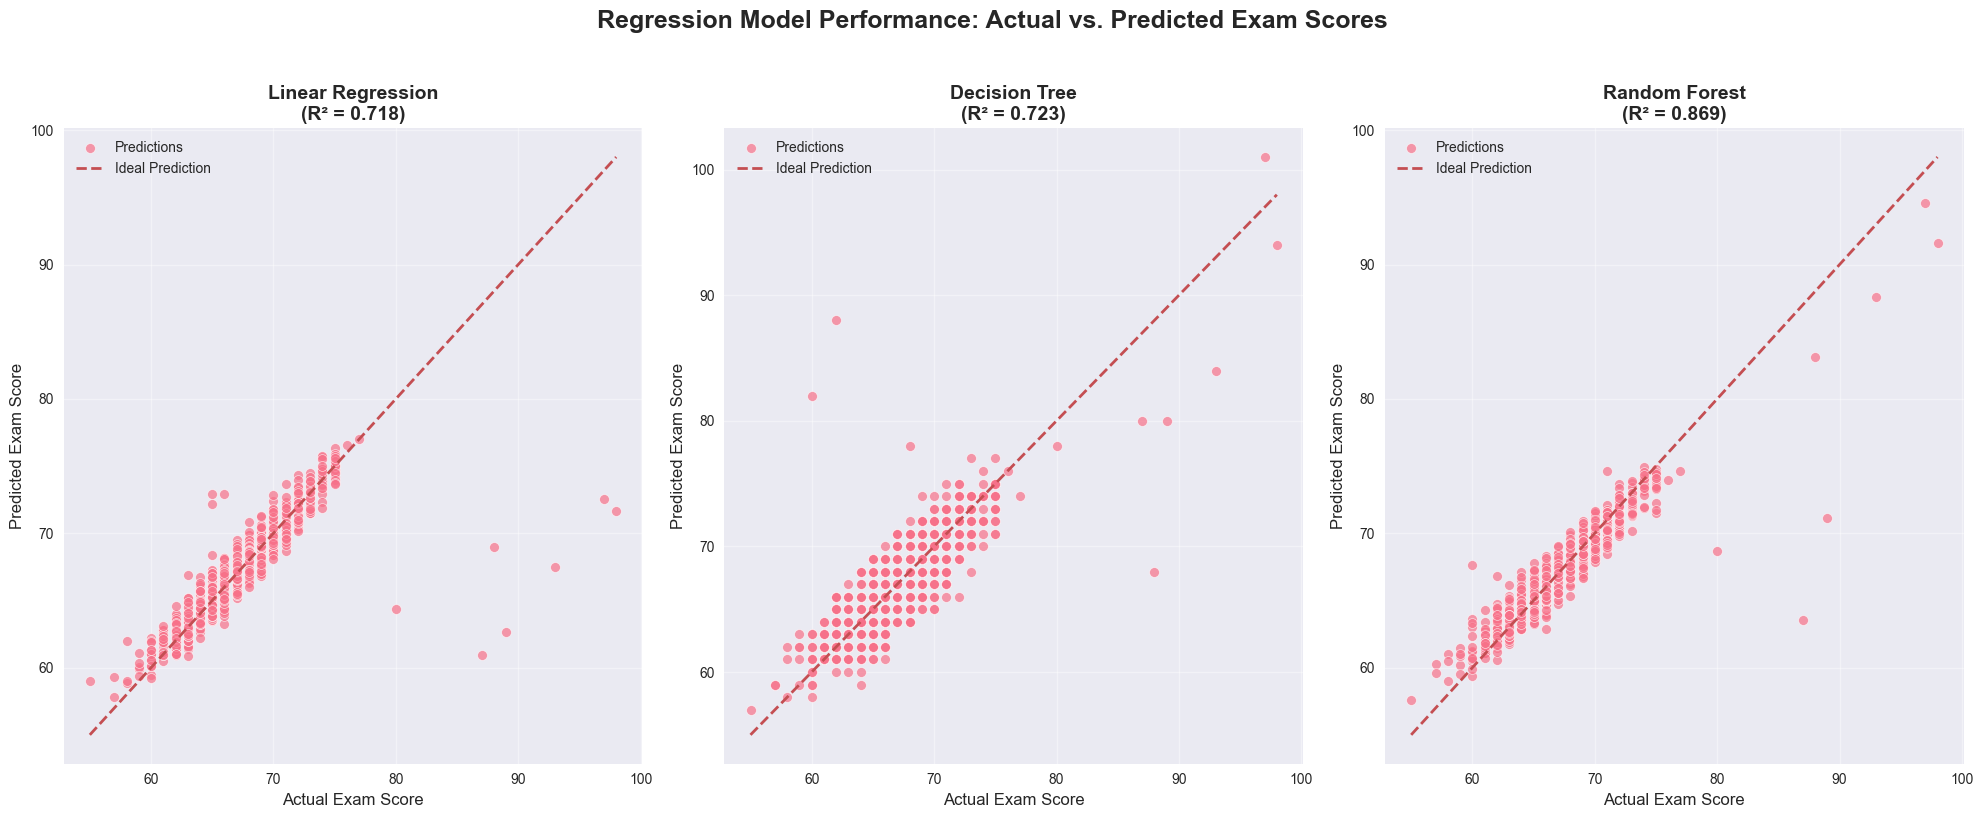

In [36]:
# Visualize regression results
fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # Slightly increase height for better spacing
fig.suptitle('Regression Model Performance: Actual vs. Predicted Exam Scores', fontsize=18, fontweight='bold', y=1.02) # Adjust title position

for i, (name, results) in enumerate(regression_results.items()):
    axes[i].scatter(y_reg_test, results['predictions'], alpha=0.7, s=50, edgecolors='w', linewidth=0.5, label='Predictions') # Add edgecolors and linewidth
    axes[i].plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2, label='Ideal Prediction')
    axes[i].set_xlabel('Actual Exam Score', fontsize=12)
    axes[i].set_ylabel('Predicted Exam Score', fontsize=12)
    axes[i].set_title(f'{name}\n(R² = {results["R2"]:.3f})', fontsize=14, fontweight='bold')
    axes[i].grid(True, alpha=0.4)
    axes[i].legend()

plt.tight_layout()
plt.show()

### 6.2 Classification Analysis

Classification models categorize students into high/low performance groups based on median exam score.

In [37]:
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

classification_results = {}

for name, model in classification_models.items():
    print(f'Training {name}...')
    model.fit(X_train_clf_scaled, y_clf_train)
    y_pred = model.predict(X_test_clf_scaled)

    accuracy = accuracy_score(y_clf_test, y_pred)
    classification_results[name] = {'accuracy': accuracy, 'predictions': y_pred}

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Classification Report:')
    print(classification_report(y_clf_test, y_pred))
    print()

Training Logistic Regression...
Accuracy: 0.9213
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       567
           1       0.93      0.93      0.93       755

    accuracy                           0.92      1322
   macro avg       0.92      0.92      0.92      1322
weighted avg       0.92      0.92      0.92      1322


Training K-Nearest Neighbors...
Accuracy: 0.8737
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       567
           1       0.89      0.89      0.89       755

    accuracy                           0.87      1322
   macro avg       0.87      0.87      0.87      1322
weighted avg       0.87      0.87      0.87      1322




### 6.3 Clustering Analysis

Clustering techniques identify natural groupings in the student data without using target labels.

In [38]:
# K-Means Clustering
print('Performing K-Means clustering...')
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_scaled)

silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Hierarchical Clustering
print('Performing Hierarchical clustering...')
linkage_matrix = linkage(X_train_scaled[:1000], method='ward')  # Use subset for performance

Performing K-Means clustering...
Silhouette Score: 0.1292
Performing Hierarchical clustering...


#### Clustering Visualization

Multiple visualization techniques show cluster patterns using dimensionality reduction and dendrograms.

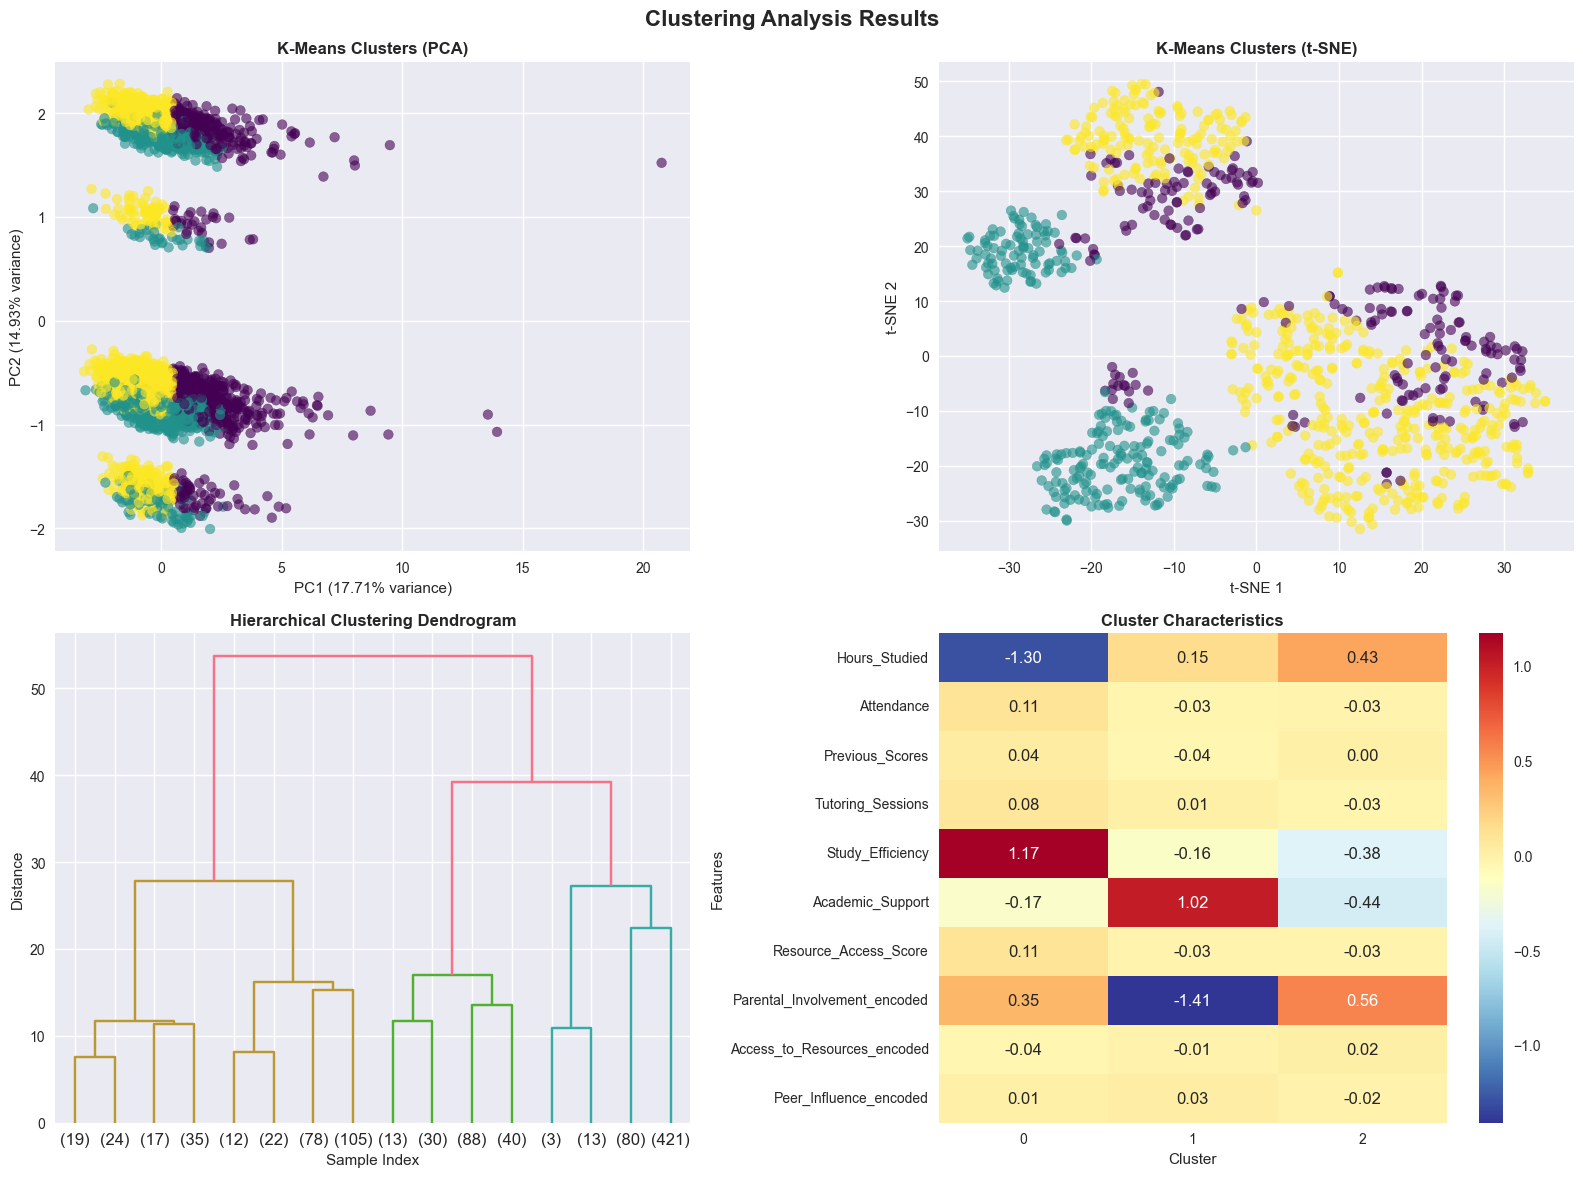

In [39]:
# Visualize clustering results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Clustering Analysis Results', fontsize=16, fontweight='bold')

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# K-Means clusters in PCA space
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
axes[0, 0].set_title('K-Means Clusters (PCA)', fontweight='bold')
axes[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_train_scaled[:1000])  # Use subset for performance

axes[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels[:1000], cmap='viridis', alpha=0.6)
axes[0, 1].set_title('K-Means Clusters (t-SNE)', fontweight='bold')
axes[0, 1].set_xlabel('t-SNE 1')
axes[0, 1].set_ylabel('t-SNE 2')

# Dendrogram
dendrogram(linkage_matrix, ax=axes[1, 0], truncate_mode='level', p=3)
axes[1, 0].set_title('Hierarchical Clustering Dendrogram', fontweight='bold')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Distance')

# Cluster characteristics
cluster_df = pd.DataFrame(X_train_scaled, columns=selected_features)
cluster_df['Cluster'] = cluster_labels
cluster_means = cluster_df.groupby('Cluster').mean()

sns.heatmap(cluster_means.T, annot=True, cmap='RdYlBu_r', ax=axes[1, 1], fmt='.2f')
axes[1, 1].set_title('Cluster Characteristics', fontweight='bold')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Features')

plt.tight_layout()
plt.show()

## **7. Model Performance Summary**

Comprehensive evaluation of all implemented models with key performance metrics.

In [40]:
print('MODEL PERFORMANCE SUMMARY')
print('='*50)

print('\nRegression Models:')
regression_summary_df = pd.DataFrame(regression_results).T[['R2', 'RMSE']]
regression_summary_df.columns = ['R² Score', 'RMSE']
display(regression_summary_df.round(4))

print('\nClassification Models:')
classification_summary_df = pd.DataFrame(classification_results).T[['accuracy']]
classification_summary_df.columns = ['Accuracy']
display(classification_summary_df.round(4))

print(f'\nClustering:')
print(f'K-Means Silhouette Score: {silhouette_avg:.4f}')

MODEL PERFORMANCE SUMMARY

Regression Models:


,R² Score,RMSE
Linear Regression,0.718474,1.994843
Decision Tree,0.723117,1.978324
Random Forest,0.868751,1.362061



Classification Models:


,Accuracy
Logistic Regression,0.921331
K-Nearest Neighbors,0.873676



Clustering:
K-Means Silhouette Score: 0.1292
